<a href="https://colab.research.google.com/github/priyadarshinivr19/Minors-Degree-Machine-Learning/blob/main/FMML_M2L4_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **t-Distributed Stochastic Neighbor Embedding (t-SNE)**

In [1]:
# numpy.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# Random state.
RS = 20150101

# matplotlib.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# seaborn.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

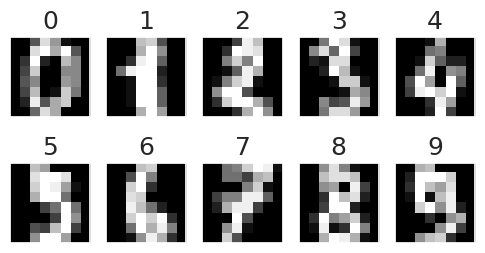

In [3]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

In [4]:
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

In [5]:
digits_proj = TSNE(init="pca", random_state=RS).fit_transform(X)

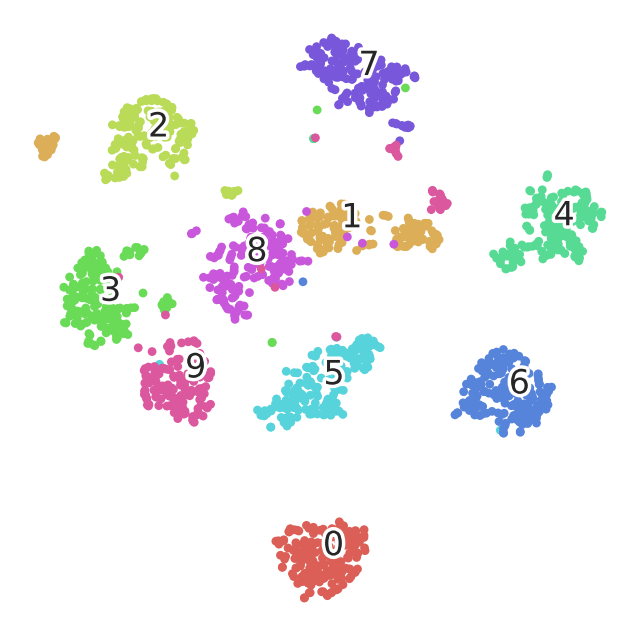

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7a7e8a52bbb0>)

In [6]:
def scatter(x, colors):
    palette = np.array(sns.color_palette("hls", 10))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    txts = []
    for i in range(10):

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.show()

    return f, ax, sc

scatter(digits_proj, y)

Tweaking the perpexlity values

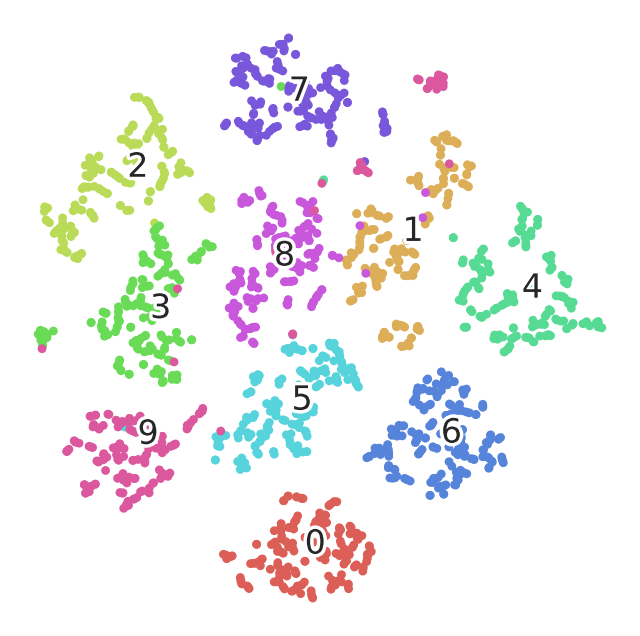

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7a7e8a704670>)

In [7]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=5).fit_transform(X)

scatter(digits_proj, y)

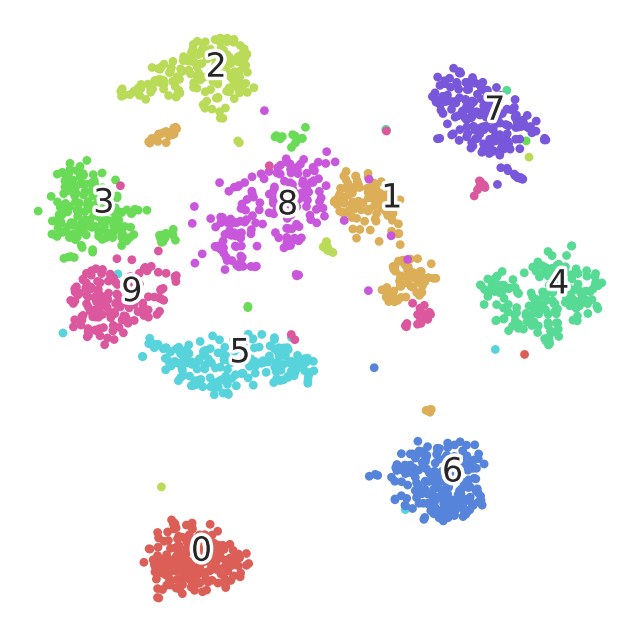

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7a7e8aaee0b0>)

In [8]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=100).fit_transform(X)

scatter(digits_proj, y)

Changing the number of iterations

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


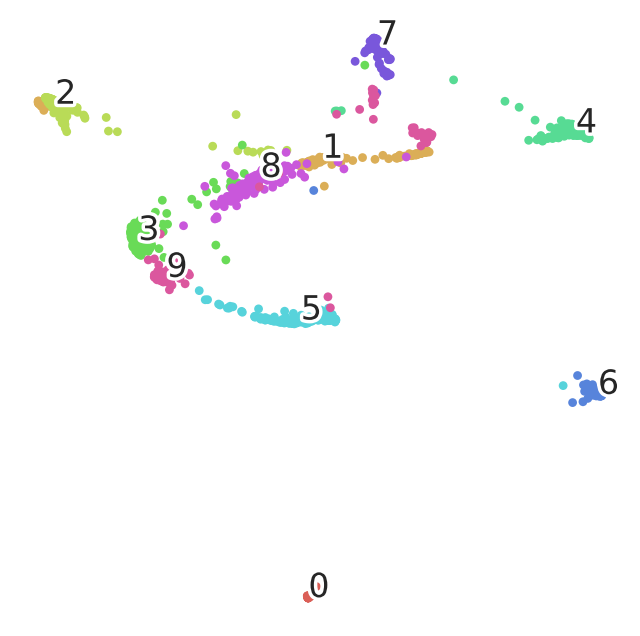

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7a7e87e55540>)

In [9]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=250).fit_transform(X)

scatter(digits_proj, y)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


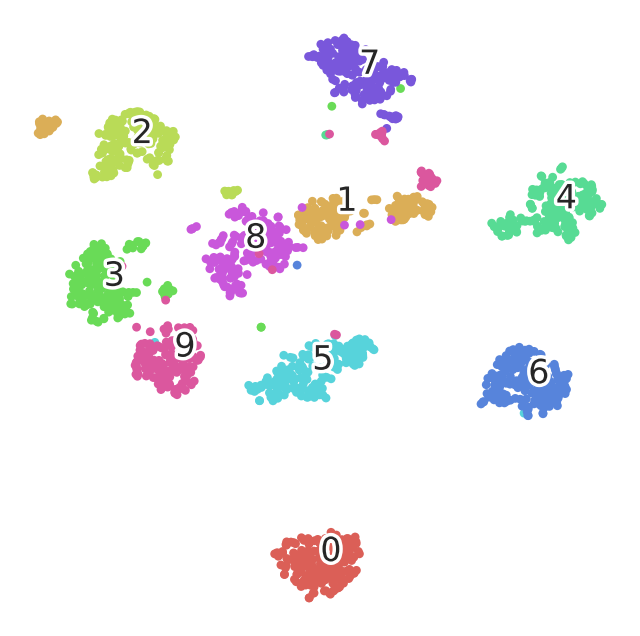

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7a7e87e3a4d0>)

In [10]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=5000).fit_transform(X)

scatter(digits_proj, y)

Changing the method to EXACT

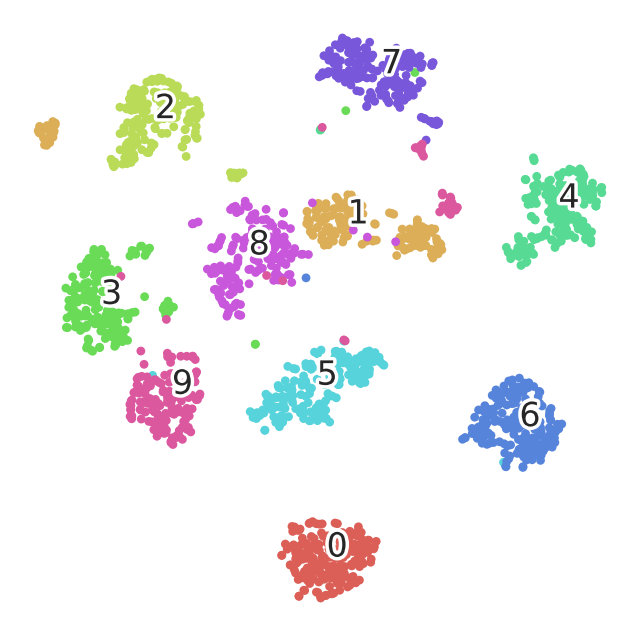

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7a7e87e2c7c0>)

In [11]:
digits_proj = TSNE(init="pca", random_state=RS, method='exact').fit_transform(X)

scatter(digits_proj, y)

#**Exercise**

Try out different perplexity and iteration values to better appreciate the concepts taught.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


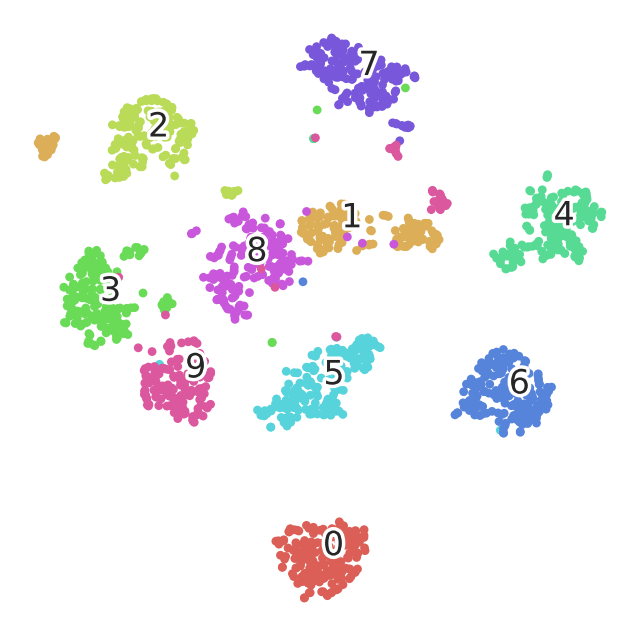

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7a7e8432aa40>)

In [12]:
perplexity_value = 30

number_iterations = 1000

method = "barnes_hut"

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)


1. Now that you understand t-SNE a bit better, can you point out some differences between PCA and t-SNE. What are the advantages/disadvantages of one over the other? \\
Pointers: \\
a. Which of the two algorithms is linear and which one is non-linear? \\
b. How does the non-linearity in one of these two algorithms help in capturing certain data sets? \\
c. PCA is known to keep points which were further apart in the higher dimension, far apart in the lower dimension as well. Does t-SNE do the same? Or does it try to preserve local neighbourhood? \\
d. Can you comment on which one of the two is computationally more expensive?

**a. Linearity vs. Non-linearity** \\
PCA: Linear method. It finds new axes (principal components) by maximizing variance, projecting data along these components in a way that preserves global linear structures. \\
t-SNE: Non-linear method. It focuses on preserving local relationships by converting pairwise distances into conditional probabilities, enabling it to capture more complex, curved, or clustered structures in data. \\

**b. Capturing Complex Data Structures** \\
PCA: Because it is linear, PCA performs well when the data has a linear relationship in high-dimensional space. However, it struggles with complex, non-linear structures. \\
t-SNE: The non-linearity of t-SNE helps it capture the local clusters and intricate patterns in data that may lie on non-linear manifolds (e.g., image data or datasets with clustering patterns). It’s particularly useful for visualizing high-dimensional data with non-linear relationships, such as images, text embeddings, or gene expressions. \\

**c. Preserving Global vs. Local Structure** \\
PCA: Emphasizes global structure by ensuring points far apart in high-dimensional space remain far in the lower-dimensional space. This means that distant relationships in the original space are largely preserved, but it might overlook fine, local details. \\
t-SNE: Prioritizes preserving local neighborhoods. It focuses on maintaining the relative distances of close data points while sacrificing the exact distances for points farther apart. This often results in clearer, more meaningful visual clusters, but at the expense of global structure. \\

**d. Computational Expense**
PCA: Computationally less expensive since it relies on linear algebra operations (e.g., eigenvalue decomposition or Singular Value Decomposition (SVD)). It scales well with larger datasets and is efficient. \\
t-SNE: More computationally expensive because it iteratively optimizes distances, typically using gradient descent. t-SNE scales poorly with larger datasets, making it slower, especially for high-dimensional, large datasets. The Barnes-Hut approximation is used to reduce computational cost for large datasets but can still be time-consuming. \\









2. How does the computational complexity and runtime of t-SNE scale with dataset size and dimensionality?

The computational complexity of t-SNE depends on both dataset size and dimensionality:

Original t-SNE: Complexity is
𝑂
(
𝑁
2
)
, making it slow for large datasets due to all-pair distance calculations. \\
Dimensionality (D): Increases the cost as
𝑂
(
𝑁
×
𝐷
)
for initial distance calculations, so high-dimensional data adds to runtime. \\
Barnes-Hut t-SNE: Reduces complexity to
𝑂
(
𝑁
log
⁡
𝑁
)
, suitable for larger datasets but less effective in very high dimensions. \\
Iterations: More iterations add linearly to runtime, impacted by other settings like perplexity.

3. What are some limitations or potential pitfalls to be aware of when using t-SNE? (tell atleast 3)

When using t-SNE, it’s essential to keep these limitations in mind:

Loss of Global Structure: t-SNE focuses on preserving local neighborhoods, so global distances between clusters may be distorted. This can mislead interpretations about the relationships between clusters.

High Computational Cost: t-SNE is computationally expensive, especially for large datasets or high-dimensional data. Even with the Barnes-Hut approximation, it may be slow and memory-intensive.

Sensitivity to Hyperparameters: t-SNE’s output can vary greatly depending on hyperparameters like perplexity, learning rate, and the number of iterations. Small changes can produce significantly different results, making interpretation challenging without careful tuning.